<a href="https://colab.research.google.com/github/shreeyaa23/A6-a-/blob/main/A6(A)_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [4]:
# Get the data for dabur
ticker = "DABUR.BO"

# Download the data
data = yf.download(ticker, start="2021-01-01", end="2024-02-22")

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,533.000000,538.299988,532.250000,533.950012,516.804382,97695
2021-01-04,537.950012,544.000000,532.950012,543.349976,525.902527,129690
2021-01-05,540.250000,542.200012,535.549988,538.750000,521.450256,95195
2021-01-06,544.000000,544.000000,530.000000,533.750000,516.610718,137129
2021-01-07,539.000000,539.200012,533.500000,535.650024,518.449829,83808


In [6]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


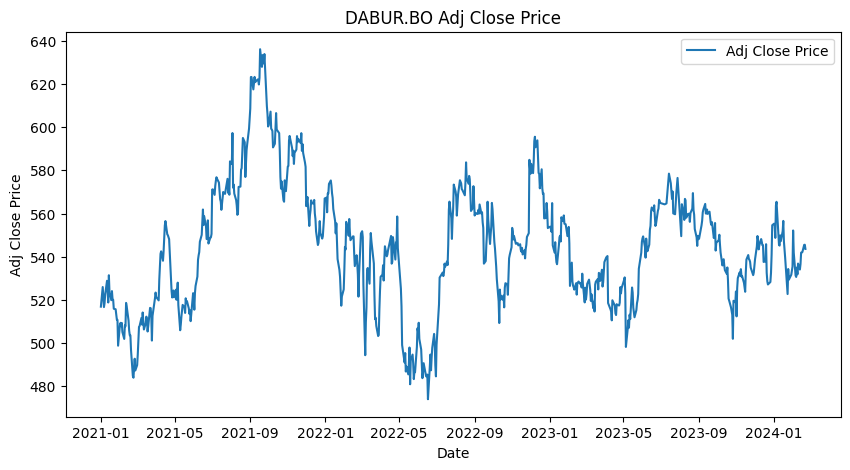

In [7]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('DABUR.BO Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
df.columns

Index(['Adj Close'], dtype='object')

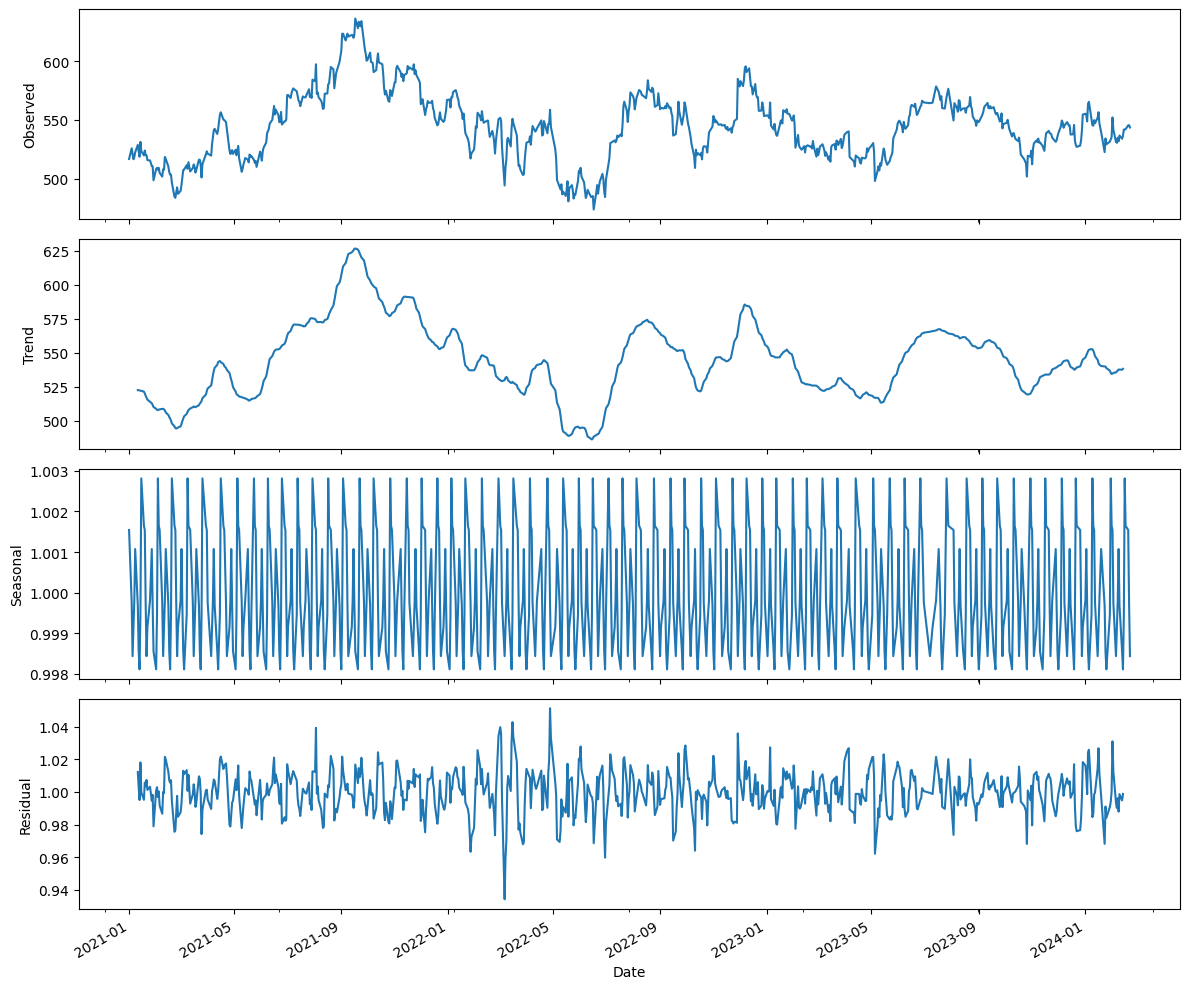

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [11]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [12]:
monthly_data = df.resample("M").mean()

In [13]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)
len(monthly_data), len(train_data)

(38, 30)

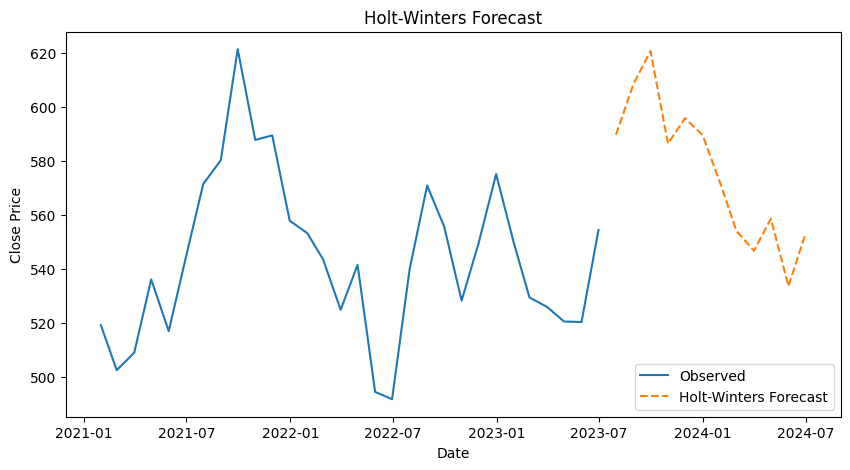

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [15]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)
len(test_data), len(y_pred)

(8, 8)

In [16]:
y_pred, test_data

(2023-07-31    589.663769
 2023-08-31    608.500771
 2023-09-30    620.622028
 2023-10-31    586.360002
 2023-11-30    595.798300
 2023-12-31    589.577831
 2024-01-31    571.942933
 2024-02-29    554.011213
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-07-31  568.410596
 2023-08-31  557.752689
 2023-09-30  555.588168
 2023-10-31  529.898859
 2023-11-30  532.054965
 2023-12-31  541.021649
 2024-01-31  545.387943
 2024-02-29  539.352120)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 47.150425258882436
MAE: 43.37623217675889
MAPE: nan
R-squared: -13.170559638775659


In [18]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)
holt_winters_forecast

2023-07-31    589.663769
2023-08-31    608.500771
2023-09-30    620.622028
2023-10-31    586.360002
2023-11-30    595.798300
2023-12-31    589.577831
2024-01-31    571.942933
2024-02-29    554.011213
2024-03-31    546.692987
2024-04-30    558.578199
2024-05-31    533.543719
2024-06-30    552.875119
2024-07-31    589.663769
2024-08-31    608.500771
2024-09-30    620.622028
2024-10-31    586.360002
2024-11-30    595.798300
2024-12-31    589.577831
2025-01-31    571.942933
2025-02-28    554.011213
Freq: M, dtype: float64

In [19]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [20]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00


In [21]:
from pmdarima import auto_arima

In [22]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'],
                         seasonal=True,
                         m=12,  # Monthly seasonality
                         stepwise=True,
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -135.734
Date:                Tue, 23 Jul 2024   AIC                            277.468
Time:                        04:03:00   BIC                            281.671
Sample:                    01-31-2021   HQIC                           278.813
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    187.5346     88.118      2.128      0.033      14.826     360.243
ar.L1          0.6544      0.162      4.034      0.000       0.337       0.972
sigma2       489.0184    158.027      3.095      0.0

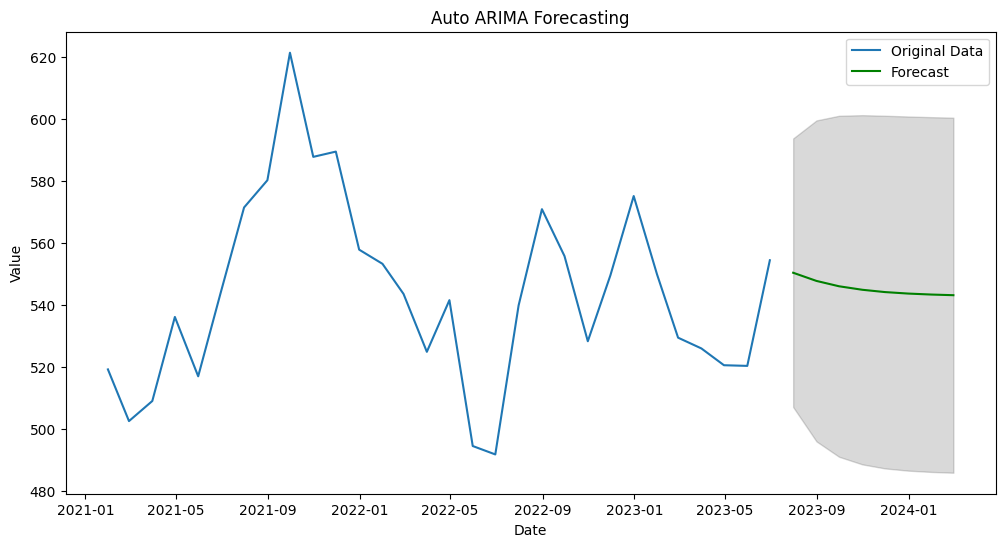

In [23]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 10.687164383336706
MAE: 9.144447102998043
MAPE: nan
R-squared: 0.2719842868381309


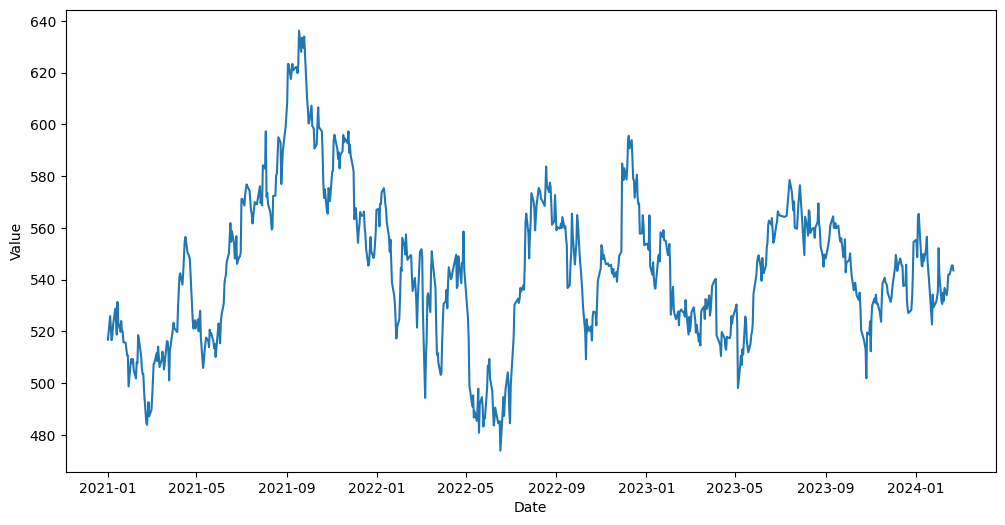

In [25]:
daily_data= df.copy()
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [26]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'],
                         seasonal=True,
                         m=7,  # Weekly seasonality
                         stepwise=True,
                         suppress_warnings=True)
# Print the model summary
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  759
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood               -2538.431
Date:                             Tue, 23 Jul 2024   AIC                           5084.863
Time:                                     04:04:49   BIC                           5103.391
Sample:                                          0   HQIC                          5091.998
                                             - 759                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.0607      4.372      3.216      0.001       5.492      22.629
ar.L1          0.9741      

In [27]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [28]:
fitted_values

Date
2021-01-01    542.767502
2021-01-04    517.560563
2021-01-05    526.423691
2021-01-06    522.089972
2021-01-07    517.379260
                 ...    
2024-02-15    541.990021
2024-02-16    541.674446
2024-02-19    542.306587
2024-02-20    545.075931
2024-02-21    545.565588
Name: predicted_mean, Length: 759, dtype: float64

In [29]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
len(forecast)

60

In [32]:
len(future_dates)

60

In [31]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

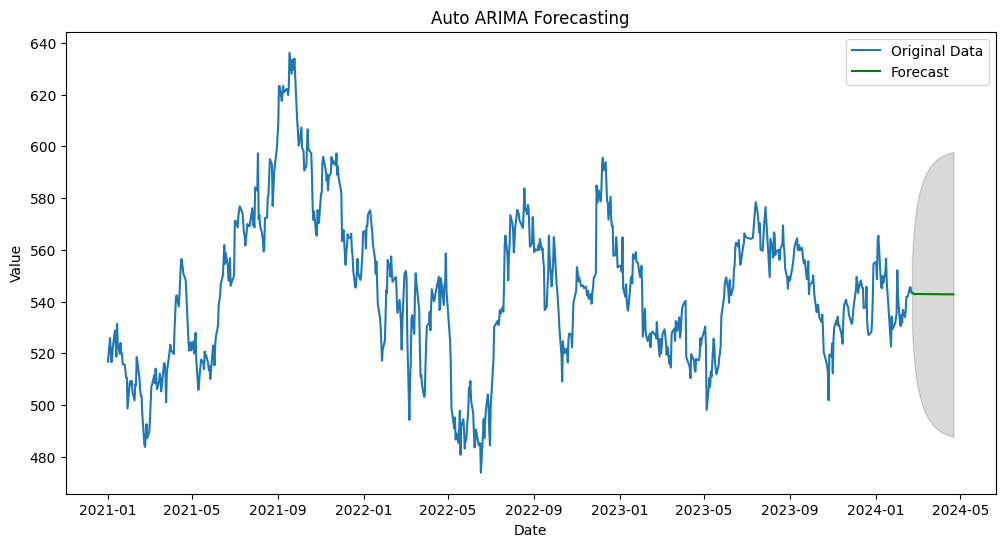

In [33]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates,
                 conf_int_df['lower_bound'],
                 conf_int_df['upper_bound'],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [35]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,533.000000,538.299988,532.250000,533.950012,516.804382,97695
2021-01-04,537.950012,544.000000,532.950012,543.349976,525.902527,129690
2021-01-05,540.250000,542.200012,535.549988,538.750000,521.450256,95195
2021-01-06,544.000000,544.000000,530.000000,533.750000,516.610718,137129
2021-01-07,539.000000,539.200012,533.500000,535.650024,518.449829,83808


In [36]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [37]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (729, 30, 6)
Shape of y: (729,)


In [38]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
19/19 [==============================] - 6s 103ms/step - loss: 0.0408 - val_loss: 0.0126
Epoch 2/20
19/19 [==============================] - 1s 51ms/step - loss: 0.0170 - val_loss: 0.0047
Epoch 3/20
19/19 [==============================] - 1s 51ms/step - loss: 0.0124 - val_loss: 0.0037
Epoch 4/20
19/19 [==============================] - 1s 34ms/step - loss: 0.0110 - val_loss: 0.0033
Epoch 5/20
19/19 [==============================] - 1s 33ms/step - loss: 0.0110 - val_loss: 0.0033
Epoch 6/20
19/19 [==============================] - 1s 39ms/step - loss: 0.0102 - val_loss: 0.0030
Epoch 7/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0102 - val_loss: 0.0030
Epoch 8/20
19/19 [==============================] - 1s 32ms/step - loss: 0.0095 - val_loss: 0.0034
Epoch 9/20
19/19 [==============================] - 1s 31ms/step - loss: 0.0089 - val_loss: 0.0028
Epoch 10/20
19/19 [==============================] - 1s 31ms/step - loss: 0.0085 - val_loss: 0.0028
Epoch 11

In [41]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 [==============================] - 1s 10ms/step


In [42]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 563.4085877542893, True Value: 564.8779296875
Prediction: 564.9298034669118, True Value: 564.237060546875
Prediction: 566.1013535597522, True Value: 564.6807861328125
Prediction: 566.4306936077337, True Value: 578.4847412109375
Prediction: 568.9425124855625, True Value: 574.0477294921875
Prediction: 571.5134216025908, True Value: 566.8005981445312
Prediction: 572.2016371439167, True Value: 570.2022705078125
Prediction: 572.3405785347786, True Value: 560.0484008789062
Prediction: 570.4248474399428, True Value: 559.6522216796875
Prediction: 567.6972834042244, True Value: 569.4593505859375


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 8.15323221454139
MAE: 6.446476183428175
MAPE: 1.1810547313786108
R-squared: 0.6777650997599901


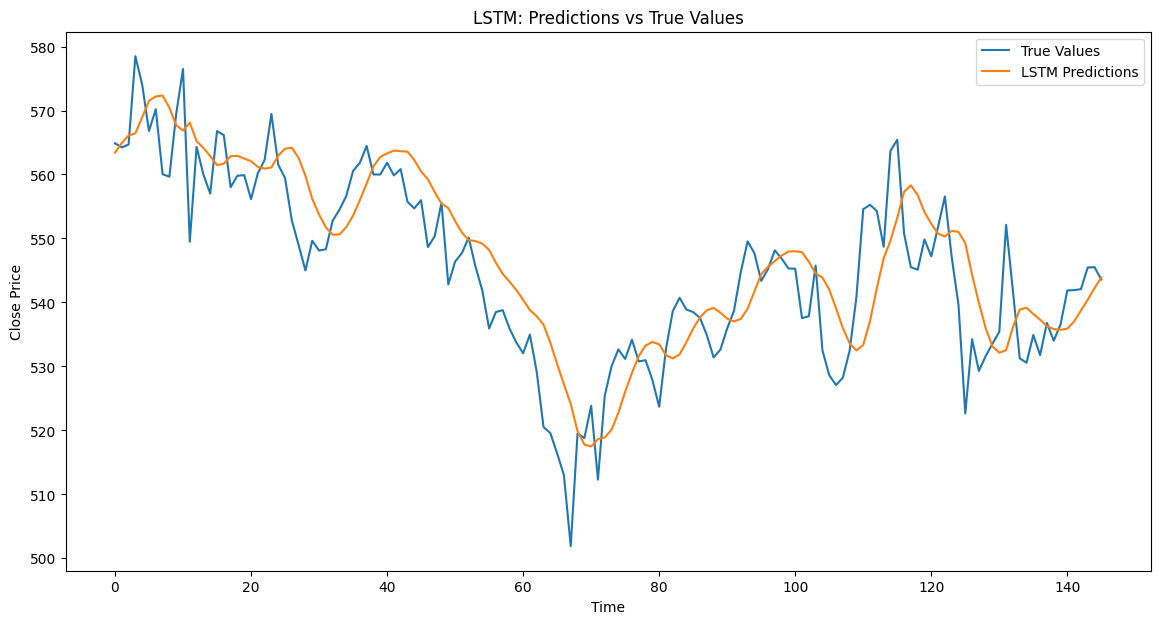

In [44]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
#TREE BASED MODEL

In [45]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [46]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.

    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]

    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [47]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [48]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.004982180683208837


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.07058456405765241
MAE: 0.05201590341583688
MAPE: 152338.85387878056
R-squared: 0.8162619627194322


In [50]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.002569233837255774


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.05068761029340182
MAE: 0.03789311163361998
MAPE: 146720.31488441775
R-squared: 0.9052491243115339


In [52]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.5418981556342914, True Value: 0.43977701849479933
Prediction: 0.885218450125111, True Value: 0.9649357672171757
Prediction: 0.07914497182271285, True Value: 0.13180806954183044
Prediction: 0.5645400141544519, True Value: 0.5173670312578733
Prediction: 0.20437445520025666, True Value: 0.3276947421701135
Prediction: 0.2841562645483622, True Value: 0.42822669986921014
Prediction: 0.25583119048568115, True Value: 0.3032392034698712
Prediction: 0.4711070932456489, True Value: 0.5420707617306335
Prediction: 0.551608470709986, True Value: 0.8016048982526547
Prediction: 0.2352575967365036, True Value: 0.3475764073413621


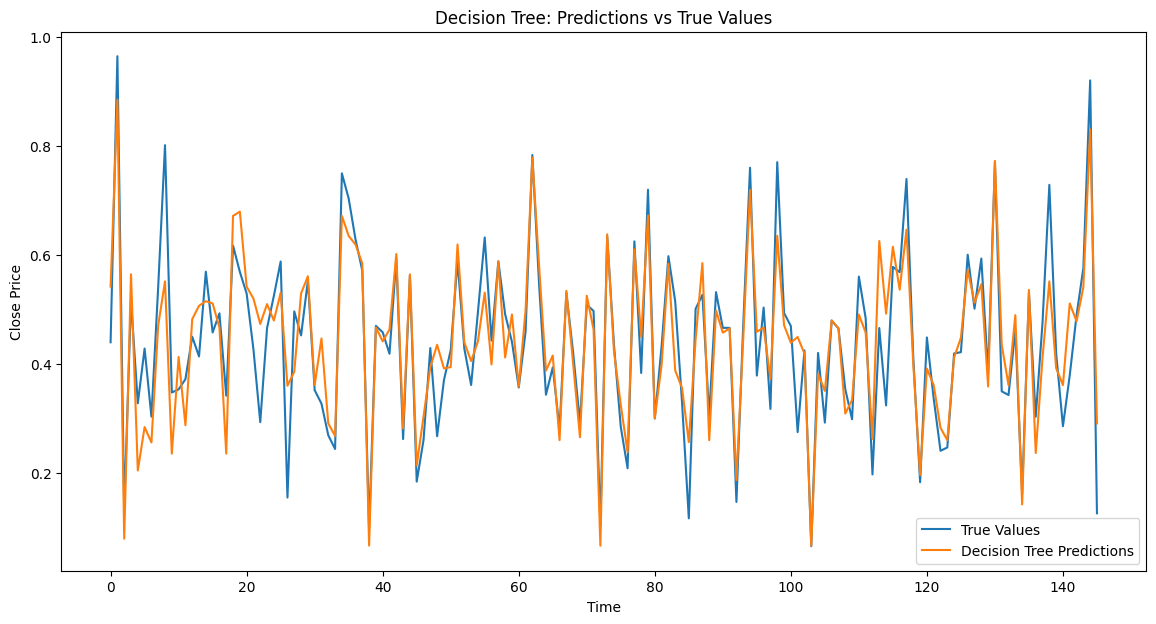

In [53]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [54]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.5345547251576955, True Value: 0.43977701849479933
Prediction: 0.9356893263247986, True Value: 0.9649357672171757
Prediction: 0.09240897754766962, True Value: 0.13180806954183044
Prediction: 0.5391563736023227, True Value: 0.5173670312578733
Prediction: 0.2483802008397904, True Value: 0.3276947421701135
Prediction: 0.3205243634069056, True Value: 0.42822669986921014
Prediction: 0.2546044744464005, True Value: 0.3032392034698712
Prediction: 0.4858841681476694, True Value: 0.5420707617306335
Prediction: 0.7389402624966432, True Value: 0.8016048982526547
Prediction: 0.24492478849172328, True Value: 0.3475764073413621


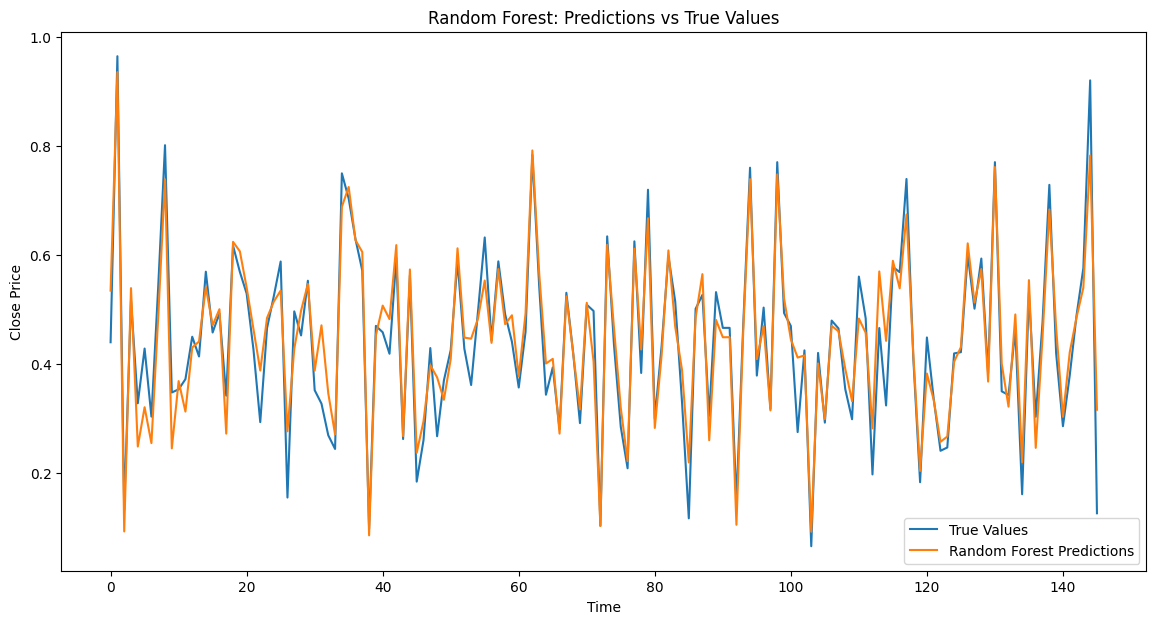

In [55]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


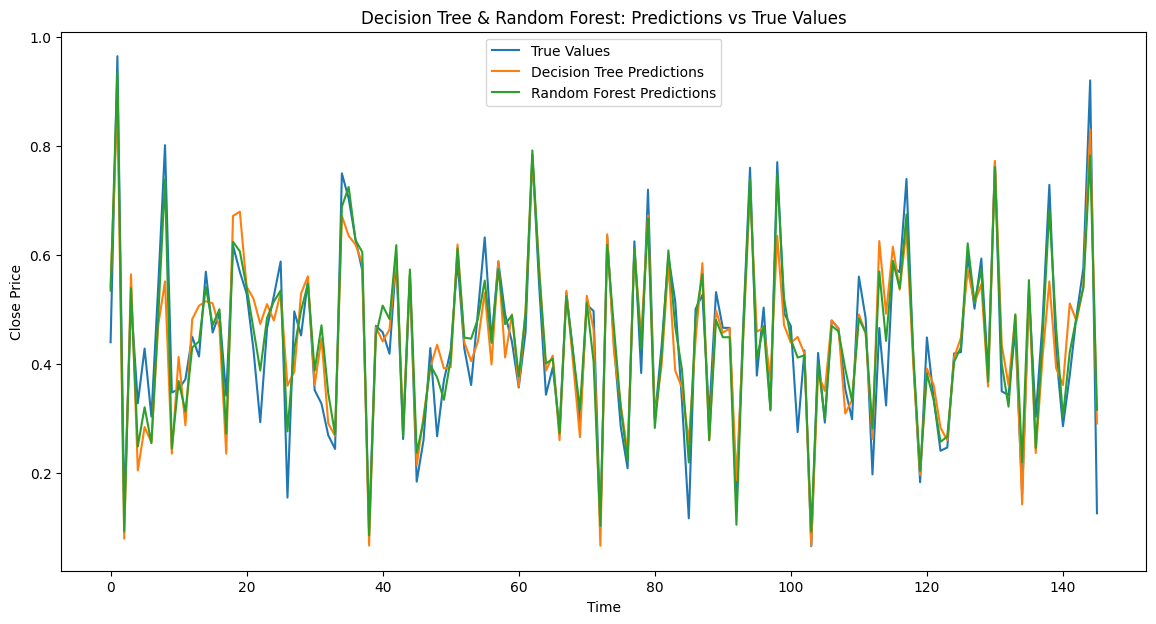

In [56]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()